In [45]:
import pandas as pd
import sklearn # scikit learn package will be very helpful
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading in the first pancreas data set

pancreas_data = pd.read_table("GSE81076_D2_3_7_10_17.txt")  
pancreas_data

,Unnamed: 0,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
0,A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,A1CF__chr10,0.000000,2.007853,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.000000,0.0
3,A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20144,ZYG11B__chr1,0.000000,1.001958,0.000000,5.049473,1.001958,1.001958,1.001958,1.001958,0.000000,...,1.001958,1.001958,2.007853,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.0
20145,ZYX__chr7,1.001958,0.000000,3.017717,2.007853,0.000000,4.031579,0.000000,1.001958,2.007853,...,7.097484,4.031579,0.000000,1.001958,1.001958,0.000000,0.000000,0.000000,1.001958,0.0
20146,ZZEF1__chr17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001958,0.000000,...,0.000000,0.000000,1.001958,0.000000,0.000000,1.001958,0.000000,0.000000,0.000000,0.0


In [3]:
# setting the gene names as the row names

pancreas_data = pancreas_data.rename(columns = {"Unnamed: 0":"Genes"}) 
pancreas_data.set_index(["Genes"], inplace = True)
pancreas_data

,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,D2ex_10,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A1CF__chr10,0.000000,2.007853,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.001958,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.000000,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
ZYG11B__chr1,0.000000,1.001958,0.000000,5.049473,1.001958,1.001958,1.001958,1.001958,0.000000,0.0,...,1.001958,1.001958,2.007853,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.0
ZYX__chr7,1.001958,0.000000,3.017717,2.007853,0.000000,4.031579,0.000000,1.001958,2.007853,0.0,...,7.097484,4.031579,0.000000,1.001958,1.001958,0.000000,0.000000,0.000000,1.001958,0.0


In [4]:
# for cosine normalization

from sklearn.preprocessing import Normalizer



In [5]:
# cosine normalization of first pancreas data set - gets rid of row names and column names though...

transformer = Normalizer().fit(pancreas_data)
pancreas_data_cnorm = pd.DataFrame(transformer.transform(pancreas_data))
pancreas_data_cnorm

,0,1,2,3,4,5,6,7,8,9,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.033422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.066485,0.033177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.033177,0.000000,0.000000,0.033177,0.033177,0.033177,0.033177,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121129,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20144,0.000000,0.007053,0.000000,0.035542,0.007053,0.007053,0.007053,0.007053,0.000000,0.0,...,0.007053,0.007053,0.014133,0.000000,0.000000,0.007053,0.007053,0.007053,0.007053,0.0
20145,0.013294,0.000000,0.040040,0.026641,0.000000,0.053492,0.000000,0.013294,0.026641,0.0,...,0.094171,0.053492,0.000000,0.013294,0.013294,0.000000,0.000000,0.000000,0.013294,0.0
20146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042107,0.000000,0.0,...,0.000000,0.000000,0.042107,0.000000,0.000000,0.042107,0.000000,0.000000,0.000000,0.0


In [23]:
# function adapted from HW1 - cosine normalization 

def normalizing_cells_MaxAbsScaler(data):
    
    """
        input data: data frame with gene expression data  
            columns are the cells and rows are genes
        output data_normalized_data_values: normalized (scaled) data
        function:  dividing the value of each gene for each cell 
                by the maximum value of that cell.
    """
    import sklearn.preprocessing
    
    # creating the list of patients
    cells = data.columns.values
    
    #using Sklearn to scale the data 
    scaler = sklearn.preprocessing.MaxAbsScaler()
    data_scaled = scaler.fit_transform(data)
    
    #creating the dataframe, the output of sklearn MaxAbsScaler is an array
    data_normalized_data_values = pd.DataFrame(data_scaled, columns= cells, index = data.index)
      
    return data_normalized_data_values

In [24]:
# cosine normalization here keeps the gene and cell names in the rows and columns

normalized_pancreas = normalizing_cells_MaxAbsScaler(pancreas_data)
normalized_pancreas

,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,D2ex_10,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.005776,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A1CF__chr10,0.000000,0.001993,0.000941,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.005776,0.000000,0.000000,0.00088,0.00088,0.000627,0.001313,0.000000,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.002632,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
ZYG11B__chr1,0.000000,0.000994,0.000000,0.038319,0.012049,0.007604,0.008911,0.01077,0.00000,0.0,...,0.005340,0.005776,0.001257,0.000000,0.00000,0.00088,0.000627,0.001313,0.000941,0.0
ZYX__chr7,0.003588,0.000000,0.002834,0.015237,0.000000,0.030595,0.000000,0.01077,0.01070,0.0,...,0.037824,0.023240,0.000000,0.001595,0.00088,0.00000,0.000000,0.000000,0.000941,0.0


In [25]:
# dropping missing values - looks like there aren't any here

normalized_pancreas.dropna(axis=1) 
normalized_pancreas

,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,D2ex_10,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.005776,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A1CF__chr10,0.000000,0.001993,0.000941,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.005776,0.000000,0.000000,0.00088,0.00088,0.000627,0.001313,0.000000,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.002632,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
ZYG11B__chr1,0.000000,0.000994,0.000000,0.038319,0.012049,0.007604,0.008911,0.01077,0.00000,0.0,...,0.005340,0.005776,0.001257,0.000000,0.00000,0.00088,0.000627,0.001313,0.000941,0.0
ZYX__chr7,0.003588,0.000000,0.002834,0.015237,0.000000,0.030595,0.000000,0.01077,0.01070,0.0,...,0.037824,0.023240,0.000000,0.001595,0.00088,0.00000,0.000000,0.000000,0.000941,0.0


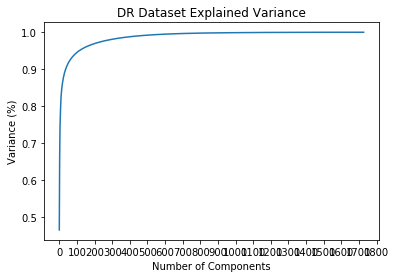

In [53]:
# graph to determine how many principal components should be selected for PCA of first data set

#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_pancreas)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800])
plt.ylabel('Variance (%)') #for each component
plt.title('DR Dataset Explained Variance')
plt.show()

# Plot shows that we could do PCA with 100 principal components (could explain 95% of variance)
# It says the number of PCs should be = min(n_samples, n_features) in the class notes though.. --> I asked the prof about this

In [26]:
# MAY NOT NEED TO DO THIS BECAUSE FUNCTION IN NEXT CELL APPEARS TO DO SCALING
# PCA is effected by scale so you need to scale the features in your data before applying PCA. 
# ^ is from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

from sklearn.preprocessing import StandardScaler
normalized_pancreas_stand = StandardScaler().fit_transform(normalized_pancreas)

Variance Threshold to find the number of components to include in the PCA

In [41]:
# adapted from HW1

from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.04): #removes features with a variation below a cutoff
                                                       #we can play around with the threshold 
    selector = VarianceThreshold(threshold)
    selector.fit_transform(data)
    return data[data.columns[selector.get_support(indices=True)]]

topgenes_pancreas_1 = variance_threshold_selector(normalized_pancreas, 0.0005) #contains the features with a variation above the cutoff
topgenes_pancreas_1

,D2ex_4,D2ex_17,D2ex_23,D2ex_25,D2ex_36,D2ex_52,D2ex_67,D2ex_71,D2ex_80,D2ex_84,...,D17All2_48,D17All2_53,D17All2_58,D17All2_71,D17All2_76,D17All2_81,D17All2_91,D17TGFB_38,D17TGFB_83,D17TGFB_88
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
A1BG__chr19,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.005776
A1CF__chr10,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.016253,0.005776
A2M-AS1__chr12,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
A2ML1__chr12,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.011852,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.014113,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
ZYG11B__chr1,0.038319,0.019295,0.0,0.0,0.000000,0.020014,0.008439,0.059727,0.0,0.028282,...,0.000000,0.007604,0.015835,0.000000,0.007604,0.005711,0.00811,0.010289,0.000000,0.005776
ZYX__chr7,0.015237,0.000000,0.0,0.0,0.018011,0.009987,0.042531,0.023750,0.0,0.014113,...,0.040547,0.007604,0.023799,0.048200,0.038319,0.011444,0.00811,0.051853,0.040873,0.023240


In [10]:
# reading in the second pancreas data set - gene names are already the row names here

pancreas_data_2 = pd.read_table("GSE85241_cellsystems_dataset_4donors_updated.csv")  
pancreas_data_2

,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A1BG__chr19,0.000000,0.000000,1.001958,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.0,0.0
A1CF__chr10,6.071431,0.000000,2.007853,6.071431,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.001958,7.097484,3.017717,0.000000,3.017717,0.000000,0.000000,0.0,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,2.007853,0.000000,1.001958,0.000000,0.000000,0.000000,0.0,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ZYG11B__chr1,2.007853,6.071431,1.001958,6.071431,3.017717,0.0,0.0,0.0,0.0,0.0,...,9.162012,2.007853,2.007853,1.001958,4.031579,2.007853,3.017717,9.162012,0.0,0.0
ZYX__chr7,0.000000,5.049473,0.000000,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,3.017717,0.000000,0.000000,0.000000,0.000000,1.001958,8.127667,5.049473,0.0,0.0
ZZEF1__chr17,0.000000,4.031579,1.001958,3.017717,0.000000,0.0,0.0,0.0,0.0,0.0,...,2.007853,0.000000,1.001958,0.000000,4.031579,0.000000,2.007853,3.017717,0.0,0.0


In [11]:
# cosine normalization for the second pancreas data set - gets rid of row names and column names though...

transformer = Normalizer().fit(pancreas_data_2)
pancreas_data_2_cnorm = pd.DataFrame(transformer.transform(pancreas_data_2))
pancreas_data_2_cnorm

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,0.000000,0.048765,0.048765,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097721,0.0,0.0
2,0.030688,0.000000,0.010149,0.030688,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.005064,0.035874,0.015253,0.000000,0.015253,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.236062,0.000000,0.117800,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19135,0.000000,0.000000,0.000000,0.179605,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
19136,0.013151,0.039767,0.006563,0.039767,0.019765,0.0,0.0,0.0,0.0,0.0,...,0.060009,0.013151,0.013151,0.006563,0.026406,0.013151,0.019765,0.060009,0.0,0.0
19137,0.000000,0.045033,0.000000,0.008936,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.026913,0.000000,0.000000,0.000000,0.000000,0.008936,0.072486,0.045033,0.0,0.0
19138,0.000000,0.042288,0.010510,0.031653,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.021061,0.000000,0.010510,0.000000,0.042288,0.000000,0.021061,0.031653,0.0,0.0


In [34]:
# cosine normalization here keeps the gene and cell names in the rows and columns

normalized_pancreas_2 = normalizing_cells_MaxAbsScaler(pancreas_data_2)
normalized_pancreas_2

,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A1BG__chr19,0.000000,0.000000,0.000627,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002492,0.0,0.0
A1CF__chr10,0.003802,0.000000,0.001257,0.006319,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000627,0.004444,0.002429,0.000000,0.001890,0.000000,0.000000,0.0,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.001257,0.000000,0.001505,0.000000,0.000000,0.000000,0.0,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ZYG11B__chr1,0.001257,0.007314,0.000627,0.006319,0.011157,0.0,0.0,0.0,0.0,0.0,...,0.016433,0.001257,0.001257,0.000807,0.006055,0.001257,0.005413,0.011371,0.0,0.0
ZYX__chr7,0.000000,0.006083,0.000000,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.005413,0.000000,0.000000,0.000000,0.000000,0.000627,0.014578,0.006267,0.0,0.0
ZZEF1__chr17,0.000000,0.004857,0.000627,0.003141,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.003601,0.000000,0.000627,0.000000,0.006055,0.000000,0.003601,0.003745,0.0,0.0


In [36]:
# dropping missing values - looks like there aren't any here

normalized_pancreas_2.dropna(axis=1) 
normalized_pancreas_2

,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A1BG__chr19,0.000000,0.000000,0.000627,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002492,0.0,0.0
A1CF__chr10,0.003802,0.000000,0.001257,0.006319,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000627,0.004444,0.002429,0.000000,0.001890,0.000000,0.000000,0.0,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.001257,0.000000,0.001505,0.000000,0.000000,0.000000,0.0,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ZYG11B__chr1,0.001257,0.007314,0.000627,0.006319,0.011157,0.0,0.0,0.0,0.0,0.0,...,0.016433,0.001257,0.001257,0.000807,0.006055,0.001257,0.005413,0.011371,0.0,0.0
ZYX__chr7,0.000000,0.006083,0.000000,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.005413,0.000000,0.000000,0.000000,0.000000,0.000627,0.014578,0.006267,0.0,0.0
ZZEF1__chr17,0.000000,0.004857,0.000627,0.003141,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.003601,0.000000,0.000627,0.000000,0.006055,0.000000,0.003601,0.003745,0.0,0.0


In [40]:
topgenes_pancreas_2 = variance_threshold_selector(normalized_pancreas_2, 0.0005) #contains the features with a variation above the cutoff
topgenes_pancreas_2

,D28-1_38,D28-3_41,D28-3_53,D28-4_4,D28-6_87,D29-1_61,D29-2_7,D29-6_74,D31-2_62,D31-4_16,...,D30-2_60,D30-2_71,D30-3_7,D30-4_82,D30-5_52,D30-6_28,D30-6_48,D30-7_88,D30-7_90,D30-8_69
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
A1BG__chr19,0.000000,0.003162,0.000000,0.000000,0.000000,0.002729,0.000000,0.0,0.000000,0.002667,...,0.000000,0.002524,0.002280,0.000000,0.0,0.001740,0.000000,0.000000,0.000000,0.000000
A1CF__chr10,0.009015,0.015780,0.000000,0.003802,0.025757,0.000000,0.000000,0.0,0.000000,0.000000,...,0.005089,0.015780,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002524
A2M-AS1__chr12,0.000000,0.000627,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
A2ML1__chr12,0.000627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ZYG11B__chr1,0.005089,0.015090,0.032471,0.008354,0.019272,0.016535,0.010606,0.0,0.000000,0.016160,...,0.011687,0.025024,0.006867,0.003162,0.0,0.007001,0.008696,0.006562,0.022901,0.005089
ZYX__chr7,0.000627,0.003802,0.013806,0.004444,0.001890,0.044996,0.031943,0.0,0.003188,0.027150,...,0.004444,0.001890,0.013817,0.003162,0.0,0.036164,0.011618,0.013150,0.000000,0.001890
ZZEF1__chr17,0.001257,0.007040,0.000000,0.002524,0.014404,0.013752,0.000000,0.0,0.006389,0.024385,...,0.011015,0.018568,0.000000,0.001890,0.0,0.001740,0.002887,0.000000,0.007604,0.001257


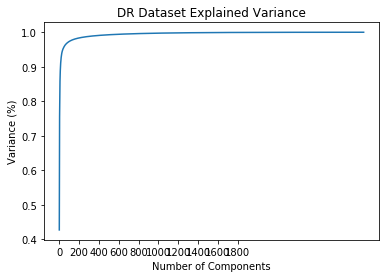

In [54]:
# graph to determine how many principal components should be selected for PCA of second data set

#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_pancreas_2)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800])
plt.ylabel('Variance (%)') #for each component
plt.title('DR Dataset Explained Variance')
plt.show()

# Plot shows that we could do PCA with 100 principal components (could explain 98% of variance)
# It says the number of PCs should be = min(n_samples, n_features) in the class notes though..